
## ¡Bienvenido a tu primer proyecto de datos!

Echa un vistazo al Kaggle Titanic Challenge en el siguiente enlace:

https://www.kaggle.com/c/titanic-gettingStarted

Nota: Deberás crear una cuenta para acceder a los datos.

Descarga el archivo train.csv y guárdalo en la misma ubicación que tus Notebooks.

In [1]:
# Ahora vamos a abrirlo con pandas
import pandas as pd
from pandas import Series,DataFrame

# Configura el archivo csv Titanic como un DataFrame
titanic_df = pd.read_csv('../../data/Titanic_train.csv')

# Revisemos una vista previa de los datos
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# También podríamos obtener información general para el conjunto de datos
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
titanic_df.describe(include=['O'])

Name   Sex    Ticket    Cabin Embarked
count                     891   891       891      204      889
unique                    891     2       681      147        3
top     Harrison, Mr. William  male  CA. 2343  B96 B98        S
freq                        1   577         7        4      644

El significado de las variables de este conjunto de datos es el siguiente:


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Definición</th>
      <th>Valores</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Survived</th>
      <td>Si el pasajero sobrevivió</td>
      <td>0 = No, 1 = Si</td>
    </tr>
    <tr>
      <th>Pclasss</th>
      <td>Clase del boleto</td>
      <td>1 = 1a, 2 = 2a, 3 = 3a</td>
    </tr>
    <tr>
      <th>Sex</th>
      <td>género</td>
      <td></td>
    </tr>
    <tr>
      <th>Age</th>
      <td>Edad en años</td>
      <td></td>
    </tr>
    <tr>
      <th>SibSp</th>
      <td>Número de hermanos o esposos en el Titanic</td>
      <td></td>
    </tr>
    <tr>
      <th>Parch</th>
      <td>Número de padres o hijos en el Titanic</td>
      <td></td>
    </tr>
    <tr>
      <th>Ticket</th>
      <td>Número de boleto</td>
      <td></td>
    </tr>
    <tr>
      <th>Fare</th>
      <td>Tarifa</td>
      <td></td>
    </tr>
    <tr>
      <th>Cabin</th>
      <td>Número de cabina</td>
      <td></td>
    </tr>
    <tr>
      <th>Embarked</th>
      <td>Puerto de Embarque</td>
      <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table>
</div>


Todos los buenos proyectos de análisis de datos, comienzan tratando de responder preguntas. Ahora que sabemos qué columnas de datos categóricos tenemos, pensemos en algunas preguntas o ideas que nos gustaría obtener de los datos. ¡Aquí hay una lista de preguntas que intentaremos responder, usando nuestras nuevas habilidades de análisis de datos!

Primero algunas preguntas básicas:

    1.) ¿Quiénes eran los pasajeros en el Titanic? (Edades, género, clase, etc.)
    2.) ¿En qué cubierta estaban los pasajeros y cómo se relaciona eso con su clase?
    3.) ¿De dónde vinieron los pasajeros?
    4.) ¿Quién estaba solo y quién estaba con la familia?

Luego profundizaremos, con una pregunta más amplia:

    5.) ¿Qué factores ayudaron a alguien a sobrevivir al hundimiento?

Entonces, comencemos con la primera pregunta: ¿Quiénes fueron los pasajeros del Titanic?

In [5]:
# Vamos a importar lo que necesitaremos para el análisis y la visualización.
# Importemos las librerias que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

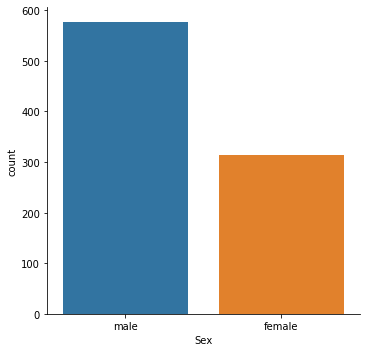

In [6]:
# Primero verifiquemos el género
#sns.factorplot('Sex',data=titanic_df)
sns.catplot('Sex',data=titanic_df,kind="count")

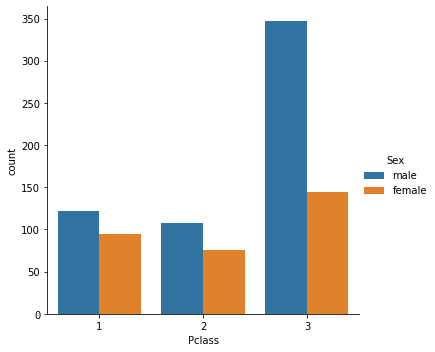

In [7]:
# Ahora separemos los géneros por clases, ¡recuerden que podemos usar el argumento 'hue' aquí!
#sns.catplot('Pclass',hue='Sex',data=titanic_df)
sns.catplot('Pclass',hue='Sex',data=titanic_df,kind="count")

Wow, hay un mayor número de hombres en la tercera clase que las mujeres; un hallazgo interesante. Sin embargo, podría ser útil saber la división entre hombres, mujeres y niños. ¿Cómo podemos hacer esto?

In [8]:
# Trataremos a cualquier persona menor de 16 años como un niño y luego usaremos la técnica de aplicar una función, para crear una nueva columna
# Primero hagamos una función para clasificar el sexo
def male_female_child(passenger):
    # Tome la edad y el sexo
    age,sex = passenger
    # Compara la edad, de lo contrario deja el sexo
    if age < 16:
        return 'child'
    else:
        return sex
# Definiremos una nueva columna de persona ('person') para incluir a los niños; especificaremos axis = 1 para que se incluya como columna
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
# Veamos si esto funcionó; verificaremos los primeros 10 renglones
titanic_df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

¡Excelente! Ahora hemos separado los pasajeros en mujeres, hombres y niños. Esto será importante más adelante, debido a la política de "Mujeres y niños primero"

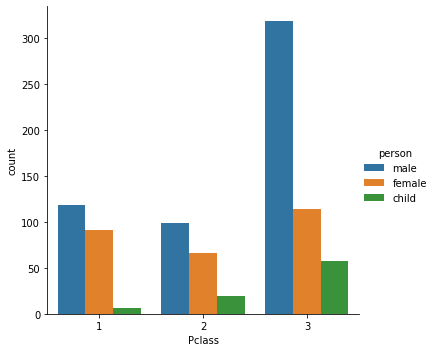

In [10]:
# ¡Intentemos el catplot nuevamente!
#sns.catplot('Pclass',data=titanic_df,hue='person')
sns.catplot('Pclass',hue='person',data=titanic_df,kind="count")

¡Interesante,hay muchos niños en 3ra clase y no tantos en 1ra! ¿Qué tal si creamos una distribución de las edades, para obtener una imagen más precisa de quiénes eran los pasajeros?

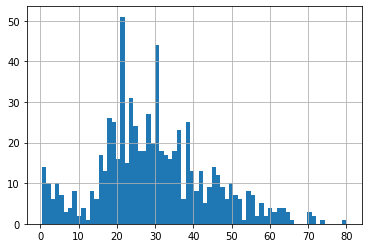

In [11]:
# Forma rápida de crear un histograma usando pandas
titanic_df['Age'].hist(bins=70)

In [12]:
# También podríamos obtener una rápida comparación general de hombres, mujeres y niños.
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

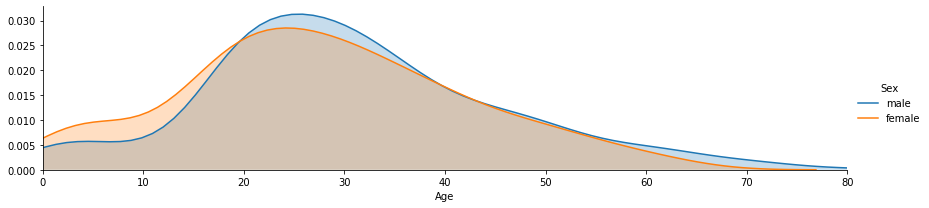

In [13]:
# Otra forma de visualizar los datos, es usar FacetGrid para trazar múltiples gráficas de densidad en un solo diagrama
# Definamos la gráfica como una cuadrícula de facetas, con el dataframe de pandas como fuente de datos
# Grafiquemos el género del pasajero con diferentes colores
# Establezcamos el tono y cambiemos la relación de aspecto.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Usemos la función map, para generar todas las gráficas de densidad posibles para la edad ('Age')
# kdeplot de Seaborn (Kernel Density Estimate) se utiliza para visualizar la densidad probabilística de diferentes valores como si fueran una variable continua.
# En este caso, aunque la edad es categórica, se muestra como una variable continua
fig.map(sns.kdeplot,'Age',shade= True)

# Establezcamos el límite máximo del eje de las x, con el valor del pasajero más viejo.
oldest = titanic_df['Age'].max()
oldest

# Como sabemos que nadie puede tener años negativos, establezcamos el límite inferior del eje de las x en 0
fig.set(xlim=(0,oldest))

# Agreguemos leyendas, para identificar a que género corresponden los datos
fig.add_legend()

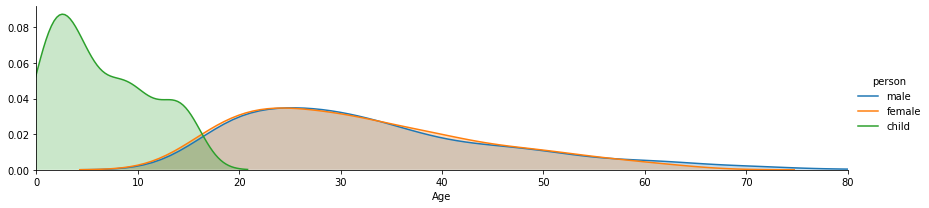

In [16]:
# Podríamos haber hecho lo mismo con la columna 'person', para incluir a los niños
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

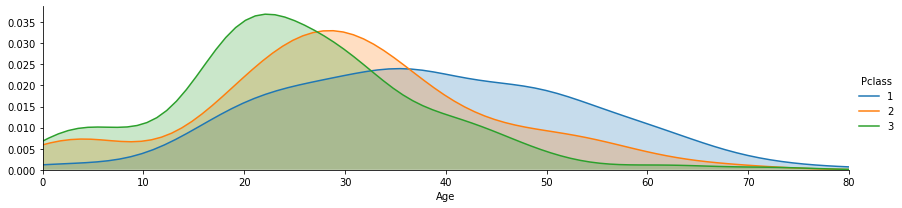

In [17]:
# Hagamos lo mismo para la clase, cambiando el argumento hue:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Con esto tenemos una mejor idea de quiénes eran los pasajeros según sexo, edad y clase. Entonces pasemos a nuestra segunda pregunta: ¿En qué cubierta estaban los pasajeros y cómo se relaciona eso con su clase?

In [18]:
# Veamos nuevamente nuestro conjunto de datos
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [19]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Entonces podemos ver que la columna de la cabina ('Cabin') tiene información sobre la cubierta, pero tiene varios valores de NaN, por lo que tendremos que descartarlos.

In [20]:
# Primero, borraremos los valores de NaN y crearemos un nuevo objeto para la cabina, deck.
deck = titanic_df['Cabin'].dropna()

In [21]:
# Una vista previa de los datos
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Solo necesitamos la primera letra de la cubierta, para clasificar su nivel (por ejemplo, A, B, C, D, E, F, G)

Cabin    204
dtype: int64


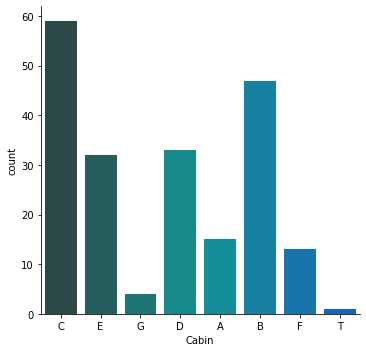

In [22]:
# Así que tomemos esa letra para el nivel de la cubierta con un ciclo

# Definamos una lista vacía para los niveles
levels = []

# Ciclo para tomar la primera letra de la cabina
for level in deck:
    levels.append(level[0])    

# Generamos un dataframe y un gráfico que muestre los niveles
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
print(cabin_df.count())
#sns.factorplot('Cabin',data=cabin_df,palette='winter_d')
sns.catplot('Cabin',data=cabin_df,kind="count",palette='winter_d')

Es interesante notar que tenemos un valor de cubierta 'T', que no tiene sentido; podemos eliminarlo con el siguiente código:

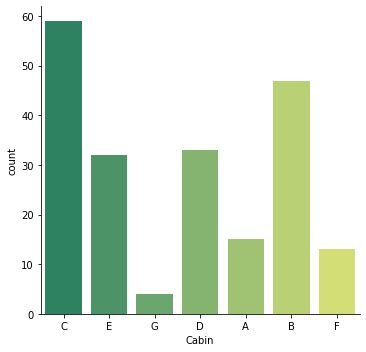

In [23]:
# Redefinamos del dataframe cabin_df con todos los renglones, excepto los que sean iguales a 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
# Volvamos a graficar
# sns.factorplot('Cabin',data=cabin_df,palette='summer')
sns.catplot('Cabin',data=cabin_df,kind="count",palette='summer')

Nota rápida: utilizamos 'winter_d' y 'summer' como paletas, pero se puede elegir la paleta que se desee.
Consulta este enlace para ver más nombres de paletas; puede agregar '_d' al final de cualquier nombre de paleta para oscurecerlo.  

Link: http://matplotlib.org/users/colormaps.html

Ahora que hemos analizado la distribución por la cubierta, sigamos adelante y respondamos nuestra tercera pregunta:   
   3.) ¿De dónde vienen las pasajeros?

In [24]:
# Veamos nuevamente nuestros datos
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

La columna de embarque ('Embarked') tiene valores C, Q y S. Al leer sobre el proyecto en Kaggle, estos significan Cherburgo, Queenstown, Southhampton.

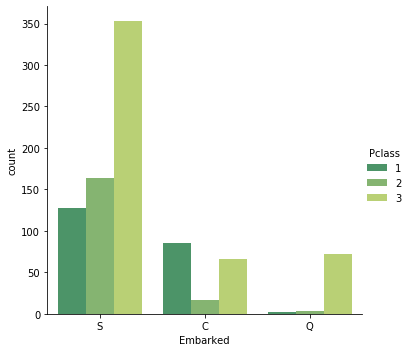

In [25]:
# Ahora podemos hacer una gráfica para ver la relación entre el lugar de embarque y la clase.
#sns.factorplot('Embarked',data=titanic_df,hue='Pclass',x_order=['C','Q','S'])
sns.catplot('Embarked',hue='Pclass',data=titanic_df,kind="count",palette='summer')

Un hallazgo interesante aquí es que, en Queenstown, casi todos los pasajeros que abordaron eran de tercera clase. Sería interesante ver la economía de esa ciudad en ese período de tiempo, para una investigación posterior.

Ahora echemos un vistazo a la cuarta pregunta:

    4.) ¿Quién estaba solo y quién estaba con la familia?

In [26]:
# Comencemos agregando una nueva columna para definir si el pasajero estaba solo o no ('Alone')

# Agregaremos la columna del número de padres/hijos ('Parch') con la columna del número de hermanos/esposos ('SibSp')
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Ahora sabemos que si la columna 'Alone' es cualquier cosa menos 0, entonces el pasajero tenía familia a bordo y no estaba solo. Cambiemos la columna, para que indicar que si el valor es mayor que 0, sepamos que el pasajero estaba con su familia, de lo contrario, estarían solos.

In [28]:
# Observemos que >0 o ==0 para poner el estatus de 'Alone'
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

TypeError: '>' not supported between instances of 'str' and 'int'

Ten en cuenta que está bien ignorar un error que a veces aparece aquí. Para más información revisa este enlace  
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [29]:
# Revisemos si funcionó
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person        Alone  
0      0         A/5 21171   7.2500   NaN        S    male  With Family  
1      0          PC 17599  71.2833   C85        C  female  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone  
3      0            113803  53.1000  C123        S  female  With Family  
4      0            373450   8.0500   NaN        S    male        Alone

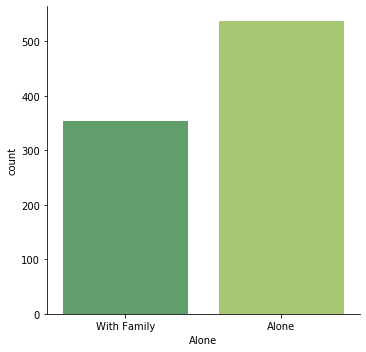

In [30]:
# ¡Ahora obtengamos una visualización simple!
#sns.factorplot('Alone',data=titanic_df,palette='Blues')
sns.catplot('Alone',data=titanic_df,kind="count",palette='summer')

¡Buen trabajo! Ahora que hemos analizado a fondo los datos, veamos la pregunta más interesante (y abierta):   
* ¿Qué factores ayudaron a alguien a sobrevivir al hundimiento? 

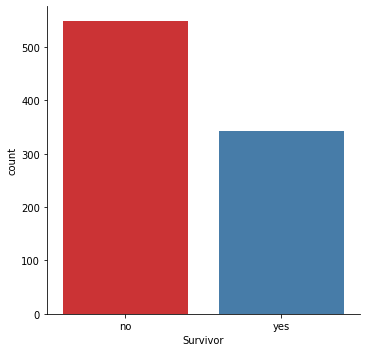

In [31]:
# Comencemos creando una nueva columna para propósitos de legibilidad, mediante un mapeo
# 0 = no, 1 = si
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Obtengamos una visión general rápida de la distribución entre los sobrevivientes y los que fallecieron.
sns.catplot('Survivor',kind='count',data=titanic_df,palette='Set1')

Así que murieron muchas más personas que las que sobrevivieron. Veamos si la clase de los pasajeros tuvo un efecto en su tasa de supervivencia, ya que la película Titanic popularizó la noción, de que los pasajeros de tercera clase no lo hicieron tan bien como sus homólogos de primera y segunda clase.

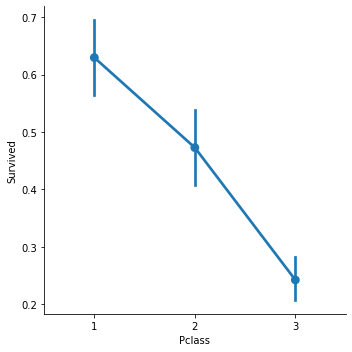

In [32]:
# Generemos la gráfica utilizando la clase
#sns.factorplot('Pclass','Survived',data=titanic_df)
sns.catplot('Pclass','Survived',data=titanic_df,kind='point')

¡Parece que las tasas de supervivencia para la tercera clase son sustancialmente más bajas! Pero tal vez este efecto sea causado por la gran cantidad de hombres en la tercera clase, en combinación con la política de mujeres y niños primero. Usemos 'hue' para obtener una imagen más clara de esto.

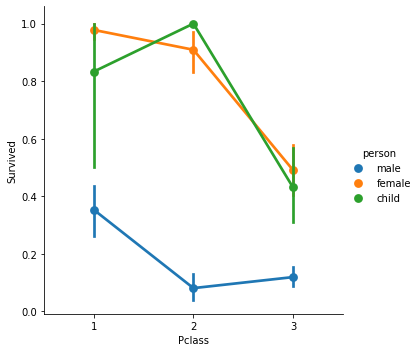

In [33]:
# Usemos nuevamente una gráfica de factores, pero ahora considerando la clase y el género
#sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)
sns.catplot('Pclass','Survived',hue='person',data=titanic_df,kind='point')

A partir de estos datos, parece que ser hombre o estar en tercera clase no fueron favorables para la supervivencia. Incluso, independientemente de la clase, el resultado de ser hombre en cualquier clase, disminuye dramáticamente sus posibilidades de supervivencia.

¿Pero qué hay de la edad? ¿Ser joven o mayor tuvo un efecto en la tasa de supervivencia?

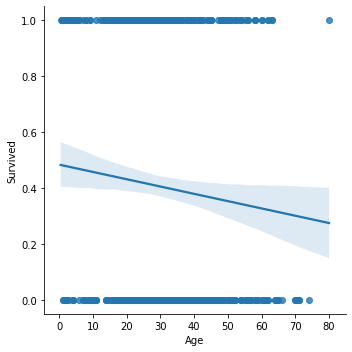

In [34]:
# Usemos una gráfica lineal sobre edad versus supervivencia
sns.lmplot('Age','Survived',data=titanic_df)

Parece que hay una tendencia general de que, cuanto más viejo era el pasajero, menos probable era que sobreviviera. Avancemos y usemos el tono para observar el efecto de la clase y la edad.

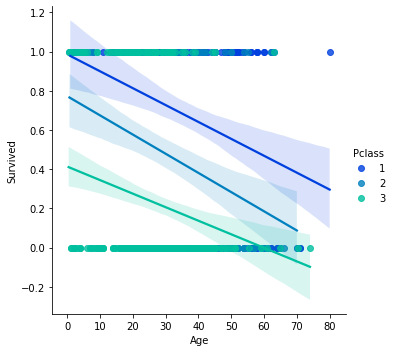

In [35]:
# Usemos una gráfica lineal sobre la edad versus la supervivencia, usando el tono para la separación de clases
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

¡También podemos usar el argumento x_bins para limpiar esta figura y tomar los datos y agruparlos por edad

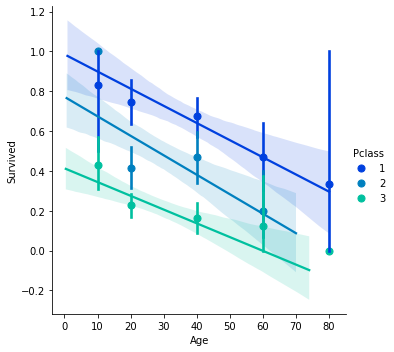

In [36]:
# Usemos una gráfica lineal sobre la edad versus la supervivencia usando el tono para la separación de clases
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

¡Interesante encontrar supervivientes en los pasajeros mayores de primera clase! ¿Qué pasa si relacionamos género y edad con el conjunto de supervivencia?

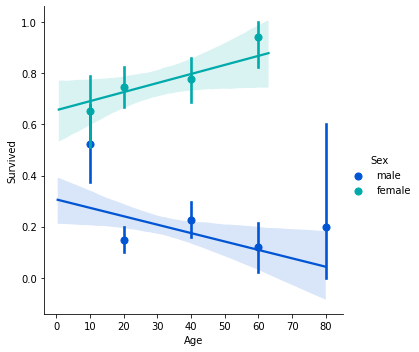

In [37]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

¡Increíble! hemos obtenido algunas ideas realmente geniales sobre cómo el género, la edad y la clase, se relacionan con la posibilidad de supervivencia de los pasajeros.

Ahora toma el control: Responde las siguientes preguntas con pandas y seaborn:

    1.) ¿La cubierta tuvo un efecto en la tasa de supervivencia de los pasajeros? ¿Esta respuesta coincide con tu intuición?
    2.) ¿Tener un miembro de la familia aumentó las probabilidades de sobrevivir al accidente?

### ¡Fantástico trabajo en tu primer proyecto de análisis de datos!

#### Finalmente, te dejo con un gif de mi escena favorita de la película Titanic

In [38]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')

#### Te recomiendo revisar el proyecto mas votado que se realizó en Kaggle
https://www.kaggle.com/startupsci/titanic-data-science-solutions